<a href="https://colab.research.google.com/github/nimamt/machine_learning/blob/master/tf/Projects/Avocado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets list

ref                                                                            title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/muratkokludataset/date-fruit-datasets                                 Date Fruit Datasets                              408KB  2022-04-03 09:25:39           4264        702  0.9375           
datasets/muratkokludataset/acoustic-extinguisher-fire-dataset                  Acoustic Extinguisher Fire Dataset               621KB  2022-04-02 22:59:36            644        621  0.9375           
datasets/muratkokludataset/pistachio-dataset                                   Pistachio Dataset                                  2MB  2022-04-03 08:38:21            399        538  0.9375           


In [ ]:
! kaggle datasets download neuromusic/avocado-prices

avocado-prices.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip avocado-prices.zip

Archive:  avocado-prices.zip
replace avocado.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
df = pd.read_csv('/content/avocado.csv')

In [ ]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [ ]:
len(df['region'].unique())

54

In [ ]:
# df = df.drop(['region','type'],axis=1)

In [ ]:
dummies = pd.get_dummies(df['region'], drop_first=True)

df = pd.concat([df.drop('region', axis=1), dummies], axis=1)

In [ ]:
dummies = pd.get_dummies(df['type'], drop_first=True)

df = pd.concat([df.drop('type', axis=1), dummies], axis=1)

In [ ]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico,organic
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df['month'] = df['Date'].apply(lambda date: int(date.split('-')[1]))
df['day'] = df['Date'].apply(lambda date: int(date.split('-')[2]))

In [ ]:
df = df.drop(['Date'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('AveragePrice', axis=1).values

In [ ]:
y = df['AveragePrice'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
X_train.shape[1:]

(65,)

In [ ]:
model = Sequential()

model.add(Dense(65, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_mse',
                           mode='min', verbose=1, patience= 30)

In [ ]:
model.fit(x=X_train, y=y_train, epochs=200,
          validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/200
400/400 [==============================] - 2s 4ms/step - loss: 0.2302 - mse: 0.2302 - mae: 0.3550 - val_loss: 0.1195 - val_mse: 0.1195 - val_mae: 0.2604
Epoch 2/200
400/400 [==============================] - 1s 4ms/step - loss: 0.1083 - mse: 0.1083 - mae: 0.2534 - val_loss: 0.0902 - val_mse: 0.0902 - val_mae: 0.2232
Epoch 3/200
400/400 [==============================] - 1s 4ms/step - loss: 0.0955 - mse: 0.0955 - mae: 0.2374 - val_loss: 0.0729 - val_mse: 0.0729 - val_mae: 0.2002
Epoch 4/200
400/400 [==============================] - 1s 3ms/step - loss: 0.0881 - mse: 0.0881 - mae: 0.2271 - val_loss: 0.0657 - val_mse: 0.0657 - val_mae: 0.1891
Epoch 5/200
400/400 [==============================] - 1s 4ms/step - loss: 0.0817 - mse: 0.0817 - mae: 0.2175 - val_loss: 0.0741 - val_mse: 0.0741 - val_mae: 0.2005
Epoch 6/200
400/400 [==============================] - 1s 3ms/step - loss: 0.0767 - mse: 0.0767 - mae: 0.2098 - val_loss: 0.0689 - val_mse: 0.0689 - val_mae: 0.1936
Epoch 7/20

In [ ]:
test_predictions = model.predict(X_test)

In [ ]:
len(test_predictions)

5475

In [ ]:
test_predictions = pd.Series(test_predictions.reshape(5475,))
test_predictions

0       0.845466
1       1.905341
2       1.507795
3       2.027539
4       1.101372
          ...   
5470    1.092353
5471    0.939143
5472    1.857681
5473    1.024021
5474    1.779218
Length: 5475, dtype: float32

In [ ]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])

In [ ]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df

,Test True Y,0
0,0.68,0.845466
1,1.94,1.905341
2,1.53,1.507795
3,2.25,2.027539
4,0.99,1.101372
...,...,...
5470,1.12,1.092353
5471,0.83,0.939143
5472,1.89,1.857681
5473,0.96,1.024021


In [ ]:
pred_df.columns = ['Test True Y', 'Model Predictions']

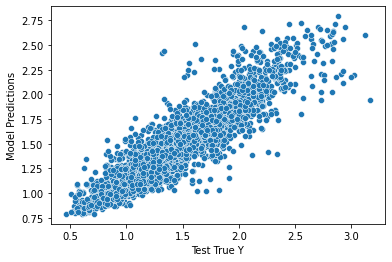

In [ ]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

0.11808860729339457

In [ ]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])**0.5

0.16289234327429203

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression()
regressor.fit(X_test, y_test)

LinearRegression()

In [ ]:
test_predictions = regressor.predict(X_test)

In [ ]:
len(test_predictions)

5475

In [ ]:
test_predictions = pd.Series(test_predictions.reshape(5475,))
test_predictions

0       1.015061
1       1.642592
2       1.551254
3       1.867117
4       1.302088
          ...   
5470    1.253755
5471    0.816082
5472    1.784951
5473    1.174865
5474    1.787473
Length: 5475, dtype: float64

In [ ]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])

In [ ]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df

,Test True Y,0
0,0.68,1.015061
1,1.94,1.642592
2,1.53,1.551254
3,2.25,1.867117
4,0.99,1.302088
...,...,...
5470,1.12,1.253755
5471,0.83,0.816082
5472,1.89,1.784951
5473,0.96,1.174865


In [ ]:
pred_df.columns = ['Test True Y', 'Model Predictions']

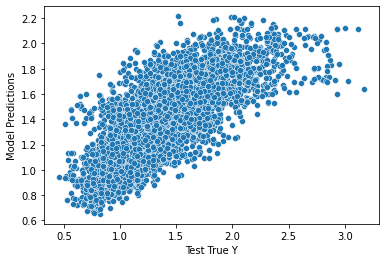

In [ ]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [ ]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

0.1966092199262178

In [ ]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])**0.5

0.2602456395130635

In [ ]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
dropout1 = Dropout(0.2)(input_)
hidden1 = keras.layers.Dense(39, activation="relu")(dropout1)
dropout2 = Dropout(0.2)(hidden1)
hidden2 = keras.layers.Dense(19, activation="relu")(dropout2)
dropout3 = Dropout(0.2)(hidden2)
concat = keras.layers.Concatenate()([dropout1, dropout3])
dropout4 = Dropout(0.2)(concat)
output = keras.layers.Dense(units=1, activation='linear')(dropout4)
model = keras.Model(inputs=[input_], outputs=[output])

model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_mse',
                           mode='min', verbose=1, patience= 30)